In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display, Math
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('Total Data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
import pandas as pd

# set date as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

### Feature Engineering

In [ ]:
# Display the volatility formula in Markdown using LaTeX
display(Math(r'V_{S,t} = \ln(H_t) - \ln(L_t)'))


<IPython.core.display.Math object>

Reference: Alizadeh, Brandt and Diebold, 1999; Gallant, Hsu and Tauchen, 1999

In [ ]:
# Function to calculate log difference volatility for a given asset
def calculate_log_volatility(df, asset_name):
    # Logarithmic difference volatility: ln(High) - ln(Low)
    df[f'log_vol_{asset_name.lower()}'] = np.log(df[f'{asset_name} High']) - np.log(df[f'{asset_name} Low'])

# List of assets to calculate volatilities for
assets = ['BTC', 'Gold', 'Spy', 'R', 'VIX']

# Loop through each asset and calculate the log volatility
for asset in assets:
    calculate_log_volatility(df, asset)
df

,BTC High,BTC Low,BTC Close,BTC Volume,Gold Close,Gold High,Gold Low,Gold Volume,Spy Close,Spy High,...,R High,R Low,VIX High,VIX Low,VIX Close,log_vol_btc,log_vol_gold,log_vol_spy,log_vol_r,log_vol_vix
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,47415.73,46770.23,47173.45,3018.46827,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.013707,NaN,NaN,NaN,NaN
2022-01-02,47211.09,46750.00,47051.37,2838.97703,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.009815,NaN,NaN,NaN,NaN
2022-01-03,46600.21,45996.26,46550.00,5734.35172,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.013045,NaN,NaN,NaN,NaN
2022-01-04,46527.39,46246.01,46407.51,2185.03432,1817.0,1819.5,1800.6,10860.0,663.50,664.82,...,1.686,1.614,17.81,16.34,16.91,0.006066,0.010442,0.002591,0.043643,0.086144
2022-01-05,43275.80,42600.05,43245.25,7148.39091,1827.5,1832.6,1811.6,10320.0,659.30,663.65,...,1.712,1.640,20.17,16.58,19.73,0.015738,0.011525,0.008307,0.042966,0.195999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,64455.13,63400.00,63548.82,3443.68917,NaN,NaN,NaN,NaN,834.00,836.50,...,NaN,NaN,16.95,15.75,15.89,0.016505,NaN,0.003665,NaN,0.073427
2024-09-24,63569.99,62900.00,63559.92,2295.13582,NaN,NaN,NaN,NaN,833.79,833.89,...,NaN,NaN,NaN,NaN,NaN,0.010595,NaN,0.004676,NaN,NaN
2024-09-25,64460.23,63645.49,63843.33,2493.73409,NaN,NaN,NaN,NaN,828.59,829.13,...,NaN,NaN,NaN,NaN,NaN,0.012720,NaN,0.002294,NaN,NaN


In [ ]:
# Function to calculate log returns using last available close if previous day is missing
def calculate_log_return(df, asset_name):
    # Initialize a column to hold the last available close price
    df[f'last_available_{asset_name.lower()}'] = df[f'{asset_name} Close'].ffill()  # Use forward fill to track last available price, but only for calculation purposes

    # Calculate log return: ln(Close_t) - ln(Last_Available_Close_t-1)
    df[f'log_return_{asset_name.lower()}'] = np.where(
        df[f'{asset_name} Close'].isnull(),  # If today's close is null, return NaN
        np.nan,
        np.log(df[f'{asset_name} Close']) - np.log(df[f'last_available_{asset_name.lower()}'].shift(1))  # Else, use the last available close to calculate the log return
    )

# List of assets to calculate log returns for
assets = ['BTC', 'Gold', 'Spy', 'R', 'VIX']

# Loop through each asset and calculate the log returns
for asset in assets:
    calculate_log_return(df, asset)

# Drop the intermediate 'last_available_*' columns if no longer needed
df.drop([f'last_available_{asset.lower()}' for asset in assets], axis=1, inplace=True)
df = df.iloc[4:,:]

In [ ]:
df.head(10)

,BTC High,BTC Low,BTC Close,BTC Volume,Gold Close,Gold High,Gold Low,Gold Volume,Spy Close,Spy High,...,log_vol_btc,log_vol_gold,log_vol_spy,log_vol_r,log_vol_vix,log_return_btc,log_return_gold,log_return_spy,log_return_r,log_return_vix
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-05,43275.80,42600.05,43245.25,7148.39091,1827.5,1832.6,1811.6,10320.0,659.30,663.65,...,0.015738,0.011525,0.008307,0.042966,0.195999,-0.070574,0.005762,-0.006350,0.030459,0.154235
2022-01-06,41950.00,41000.00,41706.71,12822.50440,1791.5,1813.7,1788.0,33200.0,650.04,651.33,...,0.022906,0.014271,0.003846,0.038970,0.098735,-0.036225,-0.019896,-0.014145,0.016336,-0.006101
2022-01-07,41999.99,41739.00,41913.58,2135.49013,1799.9,1800.7,1783.8,71890.0,655.03,663.90,...,0.006233,0.009430,0.015024,0.051264,0.113406,0.004948,0.004678,0.007647,0.021186,-0.044313
2022-01-08,42103.31,41681.17,41791.51,2460.77120,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010077,NaN,NaN,NaN,NaN,-0.002917,NaN,NaN,NaN,NaN
2022-01-09,42248.50,41811.70,42042.38,3216.08520,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010393,NaN,NaN,NaN,NaN,0.005985,NaN,NaN,NaN,NaN
2022-01-10,42387.78,41971.37,42211.05,3883.13068,1801.3,1804.4,1792.0,39840.0,647.98,658.86,...,0.009872,0.006896,0.017392,0.032605,0.190153,0.004004,0.000778,-0.010821,-0.005682,0.033546
2022-01-11,42867.55,42463.13,42561.67,3336.77438,1821.0,1825.5,1802.3,40670.0,647.75,658.22,...,0.009479,0.012790,0.016220,0.027259,0.143101,0.008272,0.010877,-0.000355,-0.005141,-0.052379
2022-01-12,43795.44,43483.20,43699.99,3331.80419,1829.8,1830.4,1816.9,45500.0,651.19,653.46,...,0.007155,0.007403,0.005294,0.024251,0.073820,0.026394,0.004821,0.005297,0.003431,-0.043859
2022-01-13,42978.10,42599.99,42660.01,4015.82873,1823.9,1830.5,1814.3,86510.0,645.00,659.96,...,0.008837,0.008889,0.022929,0.038221,0.166437,-0.024086,-0.003230,-0.009551,-0.029542,0.142079


In [ ]:
# Select all rows that don't contain any NaN values
all_trading_date = df.dropna()

# Display the result
all_trading_date.head()


,BTC High,BTC Low,BTC Close,BTC Volume,Gold Close,Gold High,Gold Low,Gold Volume,Spy Close,Spy High,...,log_vol_btc,log_vol_gold,log_vol_spy,log_vol_r,log_vol_vix,log_return_btc,log_return_gold,log_return_spy,log_return_r,log_return_vix
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-05,43275.80,42600.05,43245.25,7148.39091,1827.5,1832.6,1811.6,10320.0,659.30,663.65,...,0.015738,0.011525,0.008307,0.042966,0.195999,-0.070574,0.005762,-0.006350,0.030459,0.154235
2022-01-06,41950.00,41000.00,41706.71,12822.50440,1791.5,1813.7,1788.0,33200.0,650.04,651.33,...,0.022906,0.014271,0.003846,0.038970,0.098735,-0.036225,-0.019896,-0.014145,0.016336,-0.006101
2022-01-07,41999.99,41739.00,41913.58,2135.49013,1799.9,1800.7,1783.8,71890.0,655.03,663.90,...,0.006233,0.009430,0.015024,0.051264,0.113406,0.004948,0.004678,0.007647,0.021186,-0.044313
2022-01-10,42387.78,41971.37,42211.05,3883.13068,1801.3,1804.4,1792.0,39840.0,647.98,658.86,...,0.009872,0.006896,0.017392,0.032605,0.190153,0.004004,0.000778,-0.010821,-0.005682,0.033546
2022-01-11,42867.55,42463.13,42561.67,3336.77438,1821.0,1825.5,1802.3,40670.0,647.75,658.22,...,0.009479,0.012790,0.016220,0.027259,0.143101,0.008272,0.010877,-0.000355,-0.005141,-0.052379


In [ ]:
# Select the close price and log_vol columns
close_price_columns = ['BTC Close', 'Gold Close', 'Spy Close', 'R Close', 'VIX Close']
vol_columns = ['log_vol_btc', 'log_vol_gold', 'log_vol_spy', 'log_vol_r', 'log_vol_vix']

all_trading_date[close_price_columns].corr()

,BTC Close,Gold Close,Spy Close,R Close,VIX Close
BTC Close,1.000000,0.862280,0.867175,0.254789,-0.466765
Gold Close,0.862280,1.000000,0.887171,0.431482,-0.569314
Spy Close,0.867175,0.887171,1.000000,0.565734,-0.682735
R Close,0.254789,0.431482,0.565734,1.000000,-0.601711
VIX Close,-0.466765,-0.569314,-0.682735,-0.601711,1.000000


In [ ]:
all_trading_date[vol_columns].corr()

,log_vol_btc,log_vol_gold,log_vol_spy,log_vol_r,log_vol_vix
log_vol_btc,1.000000,0.203153,0.070692,0.174982,0.254866
log_vol_gold,0.203153,1.000000,0.126065,0.370942,0.327015
log_vol_spy,0.070692,0.126065,1.000000,0.283463,0.200529
log_vol_r,0.174982,0.370942,0.283463,1.000000,0.321652
log_vol_vix,0.254866,0.327015,0.200529,0.321652,1.000000


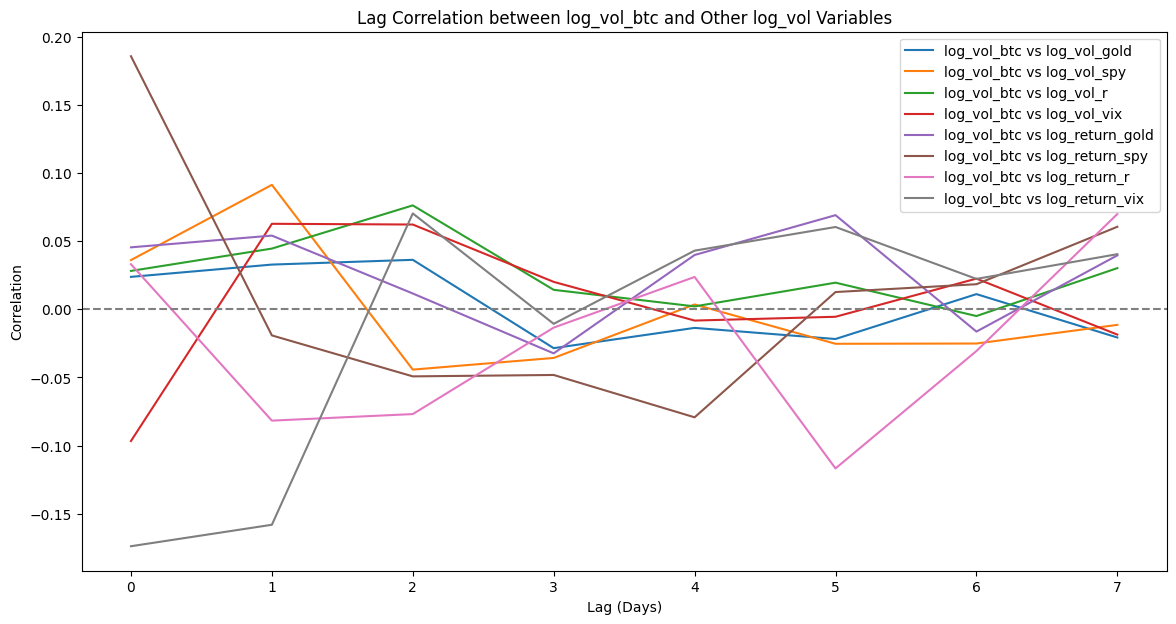

,log_vol_gold,log_vol_spy,log_vol_r,log_vol_vix,log_return_gold,log_return_spy,log_return_r,log_return_vix
0,0.02377,0.036095,0.028136,-0.096688,0.045437,0.18569,0.033051,-0.173898
1,0.032785,0.091295,0.044534,0.062716,0.054054,-0.019192,-0.081738,-0.158151
2,0.036277,-0.044296,0.07623,0.062177,0.011567,-0.049253,-0.076926,0.07032
3,-0.028541,-0.035719,0.014257,0.020099,-0.032368,-0.048225,-0.013464,-0.010689
4,-0.013668,0.003525,0.002093,-0.008301,0.039816,-0.079299,0.023708,0.04301
5,-0.02183,-0.025337,0.01951,-0.00551,0.069051,0.012632,-0.116811,0.060364
6,0.011106,-0.025147,-0.004987,0.022479,-0.016385,0.018371,-0.030665,0.022262
7,-0.020724,-0.011457,0.030187,-0.018593,0.039548,0.060527,0.06989,0.040422


In [ ]:
# Ensure the 'Date' is in datetime format and set as the index if necessary
df = all_trading_date.copy()
df['Date'] = pd.to_datetime(df.index)
df.set_index('Date', inplace=True)

# Create a function to compute the correlation at different lags
def compute_lag_correlations(df, target_col='log_return_btc', compare_cols=None, lags=range(0,8)):
    if compare_cols is None:
        compare_cols = ['log_vol_gold', 'log_vol_spy', 'log_vol_r', 'log_vol_vix','log_return_gold',
       'log_return_spy', 'log_return_r', 'log_return_vix']

    correlations = pd.DataFrame(index=lags, columns=compare_cols)
    target_data = df[target_col]

    for lag in lags:
        for col in compare_cols:
            # Shift the log_vol data of the other products by the given lag
            correlations.loc[lag, col] = target_data.corr(df[col].shift(lag))

    return correlations

# Compute correlations for lags from -7 to +7
correlation_lags = compute_lag_correlations(df, lags=range(0,8))

# Plot the lag correlations
plt.figure(figsize=(14, 7))
for col in correlation_lags.columns:
    plt.plot(correlation_lags.index, correlation_lags[col], label=f'log_vol_btc vs {col}')

plt.title('Lag Correlation between log_vol_btc and Other log_vol Variables')
plt.xlabel('Lag (Days)')
plt.ylabel('Correlation')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.show()

# Display the lag with the highest correlation for each product
best_lags = correlation_lags.idxmax()
best_correlations = correlation_lags

best_correlations

In [ ]:
# Create lag features
def create_lag_features(df, column, lag):
    df[f'{column}_lag_{lag}'] = df[column].shift(lag)

df_lag = df.copy()
for i in best_lags.index.to_list():
    create_lag_features(df_lag, i, best_lags.loc[i])


In [ ]:
df_lag

,BTC High,BTC Low,BTC Close,BTC Volume,Gold Close,Gold High,Gold Low,Gold Volume,Spy Close,Spy High,...,log_return_r,log_return_vix,log_vol_gold_lag_2,log_vol_spy_lag_1,log_vol_r_lag_2,log_vol_vix_lag_1,log_return_gold_lag_5,log_return_spy_lag_0,log_return_r_lag_7,log_return_vix_lag_2
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-05,43275.80,42600.05,43245.25,7148.39091,1827.5,1832.6,1811.6,10320.0,659.30,663.65,...,0.030459,0.154235,NaN,NaN,NaN,NaN,NaN,-0.006350,NaN,NaN
2022-01-06,41950.00,41000.00,41706.71,12822.50440,1791.5,1813.7,1788.0,33200.0,650.04,651.33,...,0.016336,-0.006101,NaN,0.008307,NaN,0.195999,NaN,-0.014145,NaN,NaN
2022-01-07,41999.99,41739.00,41913.58,2135.49013,1799.9,1800.7,1783.8,71890.0,655.03,663.90,...,0.021186,-0.044313,0.011525,0.003846,0.042966,0.098735,NaN,0.007647,NaN,0.154235
2022-01-10,42387.78,41971.37,42211.05,3883.13068,1801.3,1804.4,1792.0,39840.0,647.98,658.86,...,-0.005682,0.033546,0.014271,0.015024,0.038970,0.113406,NaN,-0.010821,NaN,-0.006101
2022-01-11,42867.55,42463.13,42561.67,3336.77438,1821.0,1825.5,1802.3,40670.0,647.75,658.22,...,-0.005141,-0.052379,0.009430,0.017392,0.051264,0.190153,NaN,-0.000355,NaN,-0.044313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-09,55150.00,54591.96,54974.01,3091.16196,2532.7,2536.5,2514.2,140580.0,813.44,813.49,...,-0.003775,-0.140321,0.011935,0.004458,0.014143,0.232552,-0.012854,-0.003265,0.002608,-0.068926
2024-09-10,57290.00,56386.40,57218.57,2969.98514,2543.1,2547.5,2528.9,156110.0,818.50,822.25,...,-0.016890,-0.019206,0.018094,0.004299,0.032896,0.104271,-0.001822,0.006201,0.006232,0.117448
2024-09-11,56819.56,56100.00,56712.00,4361.14028,2542.4,2558.0,2529.0,194090.0,820.95,824.61,...,0.005753,-0.075641,0.008831,0.004571,0.019319,0.092902,0.001188,0.002989,0.011838,-0.140321


Technical Features Related with BTC

In [ ]:
# Create moving averages


def create_lag_features(df, column, lags):
    for lag in lags:
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)

def create_moving_averages(df, column, windows):
    for window in windows:
        df[f'{column}_ma_{window}'] = df[column].rolling(window=window).mean()


# Create MACD manually
def create_macd(df, column):
    short_ema = df[column].ewm(span=12, adjust=False).mean()  # 12-period EMA
    long_ema = df[column].ewm(span=26, adjust=False).mean()   # 26-period EMA
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, adjust=False).mean()  # 9-period EMA of MACD as the signal line
    df['macd'] = macd
    df['macd_signal'] = signal_line

# Create RSI
def create_rsi(df, column, window=14):
    delta = df[column].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    df['rsi'] = 100 - (100 / (1 + rs))

# Create Bollinger Bands
def create_bollinger_bands(df, column, window=20):
    ma = df[column].rolling(window=window).mean()
    std = df[column].rolling(window=window).std()
    df['bollinger_upper'] = ma + (2 * std)
    df['bollinger_lower'] = ma - (2 * std)

# Feature engineering
def feature_engineering(df):
    # Add moving averages for BTC Close
    create_lag_features(df, 'BTC Close', lags=range(1, 31))
    create_moving_averages(df, 'BTC Close', windows=[5, 10, 20])

    # Add MACD for BTC Close
    create_macd(df, 'BTC Close')

    # Add RSI for BTC Close
    create_rsi(df, 'BTC Close')

    # Add Bollinger Bands for BTC Close
    create_bollinger_bands(df, 'BTC Close')

    # Drop rows with NaN values (resulting from lag/MA/technical indicator calculations)
    df.dropna(inplace=True)

# Perform feature engineering on the DataFrame
feature_engineering(df_lag)
df_lag

,BTC High,BTC Low,BTC Close,BTC Volume,Gold Close,Gold High,Gold Low,Gold Volume,Spy Close,Spy High,...,BTC Close_lag_29,BTC Close_lag_30,BTC Close_ma_5,BTC Close_ma_10,BTC Close_ma_20,macd,macd_signal,rsi,bollinger_upper,bollinger_lower
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-18,40444.32,40060.88,40263.71,2279.67412,1903.1,1907.9,1891.8,4600.0,610.85,619.28,...,41706.71,43245.25,42544.950,43094.311,40368.0730,328.457211,224.503494,54.908663,46764.051180,33972.094820
2022-02-22,38213.11,37712.93,38151.17,4690.14682,1910.7,1921.5,1893.0,15120.0,592.61,602.00,...,41913.58,41706.71,41436.870,42423.928,40505.6305,6.252201,180.853235,49.674739,46560.992929,34450.268071
2022-02-23,35515.83,34322.28,35312.05,26065.63785,1913.7,1916.0,1894.5,7720.0,597.50,598.77,...,42211.05,41913.58,39662.440,41574.358,40469.0325,-472.741380,50.134312,46.127088,46645.569595,34292.495405
2022-02-24,38942.46,38291.61,38466.24,7750.77677,1929.4,1979.1,1882.0,22150.0,574.98,586.04,...,42561.67,42211.05,38571.796,41011.740,40525.4150,-591.017588,-78.096068,51.222581,46601.400130,34449.429870
2022-02-25,39468.73,38910.11,39200.00,3896.27291,1890.8,1928.0,1887.7,8220.0,592.40,596.00,...,43699.99,42561.67,38278.634,40595.815,40645.4240,-618.415328,-186.159920,44.962070,46502.443204,34788.404796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-09,55150.00,54591.96,54974.01,3091.16196,2532.7,2536.5,2514.2,140580.0,813.44,813.49,...,69528.01,66890.56,56758.280,58777.668,59215.6410,-1324.060225,-873.098192,40.708704,63541.321443,54889.960557
2024-09-10,57290.00,56386.40,57218.57,2969.98514,2543.1,2547.5,2528.9,156110.0,818.50,822.25,...,66952.00,69528.01,56379.594,58136.824,59142.8390,-1297.781348,-958.034823,40.148919,63555.005291,54730.672709
2024-09-11,56819.56,56100.00,56712.00,4361.14028,2542.4,2558.0,2529.0,194090.0,820.95,824.61,...,66224.00,66952.00,56372.794,57517.793,59016.5365,-1302.813097,-1026.990478,41.714145,63559.897666,54473.175334


In [ ]:
regressors_all = ['log_vol_gold_lag_2', 'log_vol_spy_lag_1', 'log_vol_r_lag_2',
       'log_vol_vix_lag_1', 'log_return_gold_lag_5', 'log_return_spy_lag_0',
       'log_return_r_lag_7', 'log_return_vix_lag_2','macd', 'macd_signal',
       'rsi', 'bollinger_upper', 'bollinger_lower','BTC Close_ma_5',
       'BTC Close_ma_10', 'BTC Close_ma_20','BTC Close_lag_1',
       'BTC Close_lag_2', 'BTC Close_lag_3', 'BTC Close_lag_4',
       'BTC Close_lag_5', 'BTC Close_lag_6', 'BTC Close_lag_7',
       'BTC Close_lag_8', 'BTC Close_lag_9', 'BTC Close_lag_10',
       'BTC Close_lag_11', 'BTC Close_lag_12', 'BTC Close_lag_13',
       'BTC Close_lag_14', 'BTC Close_lag_15', 'BTC Close_lag_16',
       'BTC Close_lag_17', 'BTC Close_lag_18', 'BTC Close_lag_19',
       'BTC Close_lag_20', 'BTC Close_lag_21', 'BTC Close_lag_22',
       'BTC Close_lag_23', 'BTC Close_lag_24', 'BTC Close_lag_25',
       'BTC Close_lag_26', 'BTC Close_lag_27', 'BTC Close_lag_28',
       'BTC Close_lag_29', 'BTC Close_lag_30']

In [ ]:
regressors_exgo = ['log_vol_gold_lag_2', 'log_vol_spy_lag_1', 'log_vol_r_lag_2',
       'log_vol_vix_lag_1', 'log_return_gold_lag_5', 'log_return_spy_lag_0',
       'log_return_r_lag_7', 'log_return_vix_lag_2']

In [ ]:
regressors_exgo_tech = ['log_vol_gold_lag_2', 'log_vol_spy_lag_1', 'log_vol_r_lag_2',
       'log_vol_vix_lag_1', 'log_return_gold_lag_5', 'log_return_spy_lag_0',
       'log_return_r_lag_7', 'log_return_vix_lag_2','macd', 'macd_signal',
       'rsi', 'bollinger_upper', 'bollinger_lower']

In [ ]:
regressors_exgo_tech_ma = ['log_vol_gold_lag_2', 'log_vol_spy_lag_1', 'log_vol_r_lag_2',
       'log_vol_vix_lag_1', 'log_return_gold_lag_5', 'log_return_spy_lag_0',
       'log_return_r_lag_7', 'log_return_vix_lag_2','macd', 'macd_signal',
       'rsi', 'bollinger_upper', 'bollinger_lower','BTC Close_ma_5',
       'BTC Close_ma_10', 'BTC Close_ma_20']

# Modeling Data

##Time Series Using Prophet

In [ ]:
df_lag_cleaned = df_lag.dropna()
df_lag_cleaned= df_lag_cleaned.reset_index()
df_lag_cleaned  = df_lag_cleaned.rename(columns={'Date': 'ds', 'log_return_btc': 'y'})


####All lag exgo variables

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbq2c6up7/73wp4vtv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbq2c6up7/u3h8m76d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26382', 'data', 'file=/tmp/tmpbq2c6up7/73wp4vtv.json', 'init=/tmp/tmpbq2c6up7/u3h8m76d.json', 'output', 'file=/tmp/tmpbq2c6up7/prophet_model7p72f4px/prophet_model-20241007231043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:10:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:10:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-26-d3dab6caad73>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

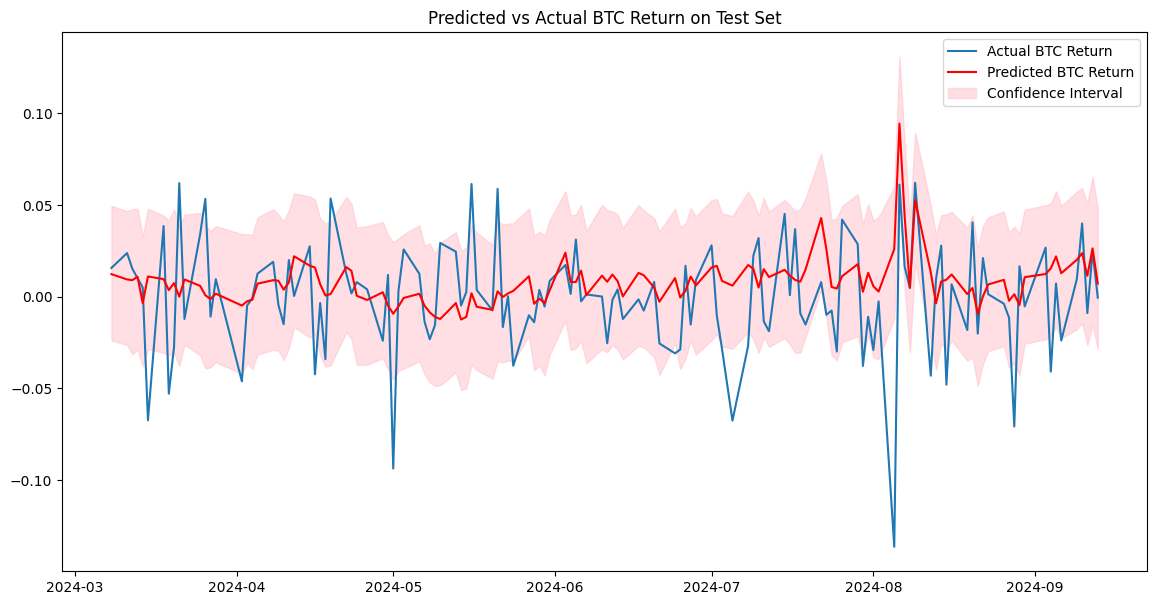

Mean Squared Error (MSE) on Test Set: 0.0010153315149863242
Mean Absolute Error (MAE) on Test Set: 0.023145557923332904


In [ ]:
from prophet import Prophet
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_absolute_error,mean_squared_error
# Splitting data into train and test
train_size = int(0.8 * len(df_lag_cleaned))
train_df = df_lag_cleaned[:train_size].copy()
test_df = df_lag_cleaned[train_size:].copy()
m = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=0.1)


for reg in regressors_exgo:
    m.add_regressor(reg)

m.fit(train_df)


future_test = test_df[['ds']]
# Add regressors for the test data
for reg in regressors_exgo:
    future_test[reg] = test_df[reg].values

# Predict the BTC Close prices on the test set
forecast_test = m.predict(future_test)

# Plot predicted vs actual for the test set
plt.figure(figsize=(14, 7))
plt.plot(test_df['ds'], test_df['y'], label='Actual BTC Return')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted BTC Return', color='r')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='pink', alpha=0.5, label='Confidence Interval')
plt.title('Predicted vs Actual BTC Return on Test Set')
plt.legend()
plt.show()

# Step 4: Forward prediction for 12 days
future_forward = m.make_future_dataframe(periods=12, freq='D', include_history=False)

for reg in regressors_exgo:
    future_forward[reg] = test_df[reg].values[-12:]
forecast_forward = m.predict(future_forward)

forecast_test[['ds', 'yhat']].tail(12), forecast_forward[['ds', 'yhat']]

mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])

# Print out the metrics
print(f"Mean Squared Error (MSE) on Test Set: {mse}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae}")


####All lag exgo variables with technical variables

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbq2c6up7/xelt24eg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbq2c6up7/n8o6chgg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12672', 'data', 'file=/tmp/tmpbq2c6up7/xelt24eg.json', 'init=/tmp/tmpbq2c6up7/n8o6chgg.json', 'output', 'file=/tmp/tmpbq2c6up7/prophet_model7a8xpfv_/prophet_model-20241007231048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:10:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-27-6c2dcd4db31c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

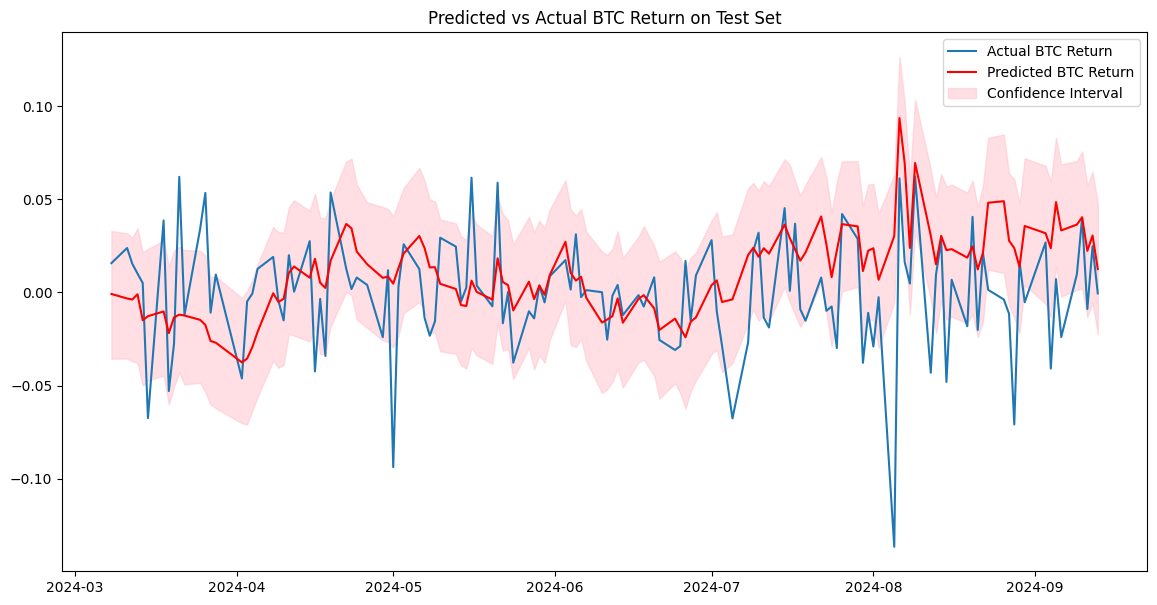

Mean Squared Error (MSE) on Test Set: 0.001241554727774584
Mean Absolute Error (MAE) on Test Set: 0.025845567276457267


In [ ]:

# Splitting data into train and test
train_size = int(0.8 * len(df_lag_cleaned))
train_df = df_lag_cleaned[:train_size].copy()
test_df = df_lag_cleaned[train_size:].copy()
m = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=0.1)


for reg in regressors_exgo_tech:
    m.add_regressor(reg)

m.fit(train_df)


future_test = test_df[['ds']]
# Add regressors for the test data
for reg in regressors_exgo_tech:
    future_test[reg] = test_df[reg].values

# Predict the BTC Close prices on the test set
forecast_test = m.predict(future_test)

# Plot predicted vs actual for the test set
plt.figure(figsize=(14, 7))
plt.plot(test_df['ds'], test_df['y'], label='Actual BTC Return')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted BTC Return', color='r')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='pink', alpha=0.5, label='Confidence Interval')
plt.title('Predicted vs Actual BTC Return on Test Set')
plt.legend()
plt.show()

# Step 4: Forward prediction for 12 days
future_forward = m.make_future_dataframe(periods=12, freq='D', include_history=False)

for reg in regressors_exgo_tech:
    future_forward[reg] = test_df[reg].values[-12:]
forecast_forward = m.predict(future_forward)



mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])

# Print out the metrics
print(f"Mean Squared Error (MSE) on Test Set: {mse}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae}")



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbq2c6up7/f3qpstj4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbq2c6up7/49mb63pj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43209', 'data', 'file=/tmp/tmpbq2c6up7/f3qpstj4.json', 'init=/tmp/tmpbq2c6up7/49mb63pj.json', 'output', 'file=/tmp/tmpbq2c6up7/prophet_model9qfei5j2/prophet_model-20241007231051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:10:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-28-8b5b9be29a45>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

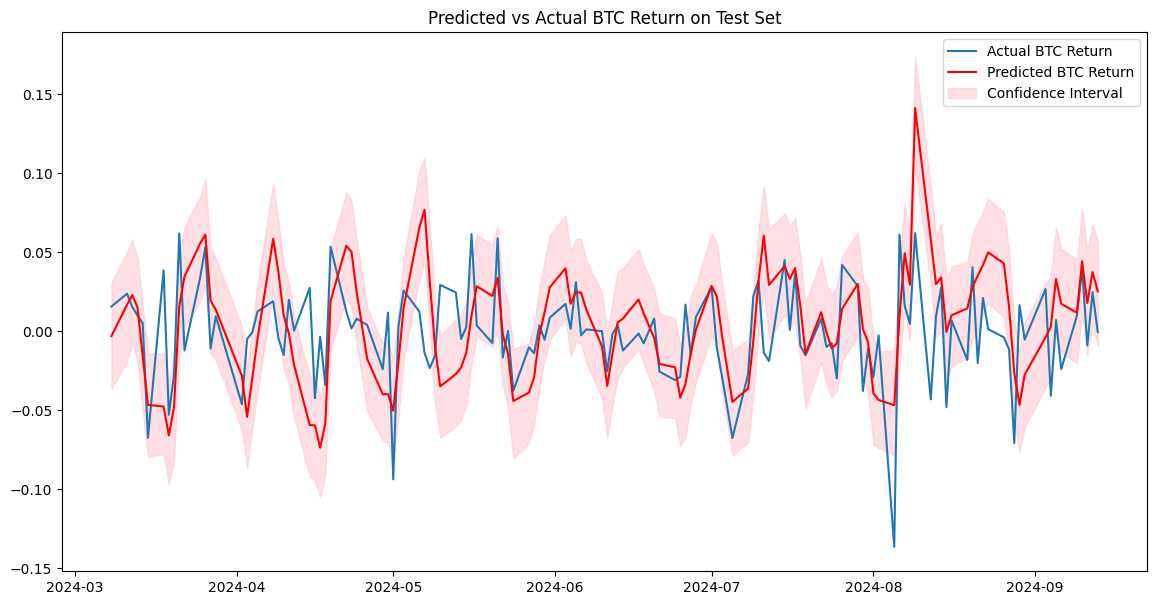

Mean Squared Error (MSE) on Test Set: 0.0011983447797053112
Mean Absolute Error (MAE) on Test Set: 0.027102931282683693


In [ ]:
# Splitting data into train and test
train_size = int(0.8 * len(df_lag_cleaned))
train_df = df_lag_cleaned[:train_size].copy()
test_df = df_lag_cleaned[train_size:].copy()
m = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=0.1)


for reg in regressors_exgo_tech_ma:
    m.add_regressor(reg)

m.fit(train_df)


future_test = test_df[['ds']]
# Add regressors for the test data
for reg in regressors_exgo_tech_ma:
    future_test[reg] = test_df[reg].values

# Predict the BTC Close prices on the test set
forecast_test = m.predict(future_test)

# Plot predicted vs actual for the test set
plt.figure(figsize=(14, 7))
plt.plot(test_df['ds'], test_df['y'], label='Actual BTC Return')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted BTC Return', color='r')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='pink', alpha=0.5, label='Confidence Interval')
plt.title('Predicted vs Actual BTC Return on Test Set')
plt.legend()
plt.show()

# Step 4: Forward prediction for 12 days
future_forward = m.make_future_dataframe(periods=12, freq='D', include_history=False)

for reg in regressors_exgo_tech_ma:
    future_forward[reg] = test_df[reg].values[-12:]
forecast_forward = m.predict(future_forward)

forecast_test[['ds', 'yhat']].tail(12), forecast_forward[['ds', 'yhat']]

mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])

# Print out the metrics
print(f"Mean Squared Error (MSE) on Test Set: {mse}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae}")


In [ ]:
df_lag_cleaned.columns

Index(['ds', 'BTC High', 'BTC Low', 'BTC Close', 'BTC Volume', 'Gold Close',
       'Gold High', 'Gold Low', 'Gold Volume', 'Spy Close', 'Spy High',
       'Spy Low', 'Spy Volume', 'R Close', 'R High', 'R Low', 'VIX High',
       'VIX Low', 'VIX Close', 'log_vol_btc', 'log_vol_gold', 'log_vol_spy',
       'log_vol_r', 'log_vol_vix', 'y', 'log_return_gold', 'log_return_spy',
       'log_return_r', 'log_return_vix', 'log_vol_gold_lag_2',
       'log_vol_spy_lag_1', 'log_vol_r_lag_2', 'log_vol_vix_lag_1',
       'log_return_gold_lag_5', 'log_return_spy_lag_0', 'log_return_r_lag_7',
       'log_return_vix_lag_2', 'BTC Close_lag_1', 'BTC Close_lag_2',
       'BTC Close_lag_3', 'BTC Close_lag_4', 'BTC Close_lag_5',
       'BTC Close_lag_6', 'BTC Close_lag_7', 'BTC Close_lag_8',
       'BTC Close_lag_9', 'BTC Close_lag_10', 'BTC Close_lag_11',
       'BTC Close_lag_12', 'BTC Close_lag_13', 'BTC Close_lag_14',
       'BTC Close_lag_15', 'BTC Close_lag_16', 'BTC Close_lag_17',
       'BTC Close

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbq2c6up7/4pw8vxa0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbq2c6up7/6o05cr1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13417', 'data', 'file=/tmp/tmpbq2c6up7/4pw8vxa0.json', 'init=/tmp/tmpbq2c6up7/6o05cr1o.json', 'output', 'file=/tmp/tmpbq2c6up7/prophet_modelvwmdqt4_/prophet_model-20241007231057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-30-3803a6bc2b3c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

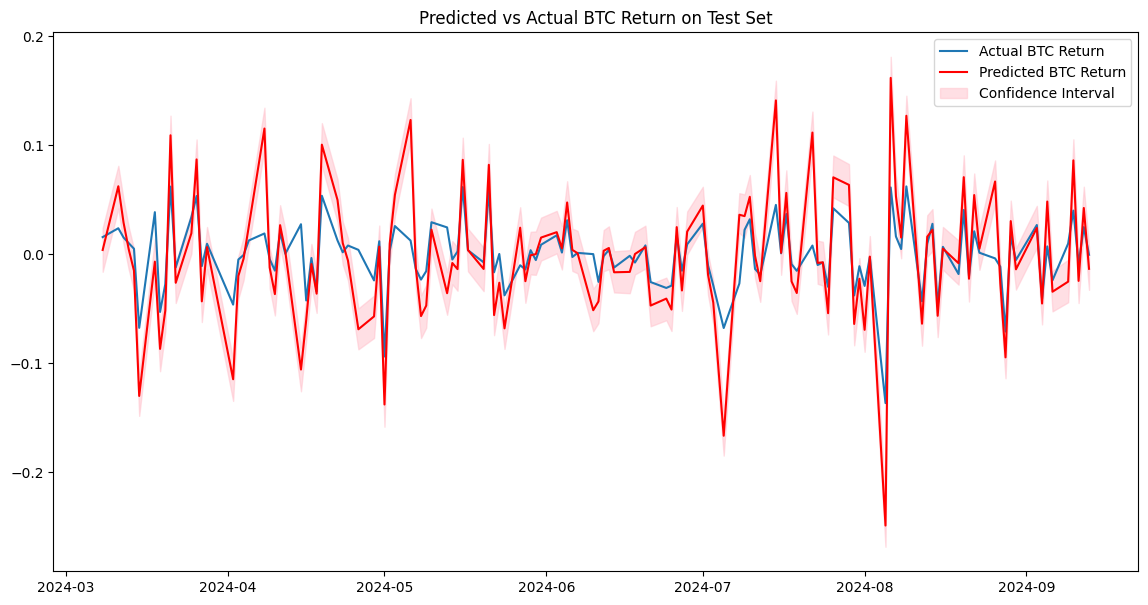

Mean Squared Error (MSE) on Test Set: 0.0013384695095054974


In [ ]:
# Splitting data into train and test
train_size = int(0.8 * len(df_lag_cleaned))
train_df = df_lag_cleaned[:train_size].copy()
test_df = df_lag_cleaned[train_size:].copy()
m = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=0.1)


for reg in regressors_all:
    m.add_regressor(reg)

m.fit(train_df)


future_test = test_df[['ds']]
# Add regressors for the test data
for reg in regressors_all:
    future_test[reg] = test_df[reg].values

# Predict the BTC Close prices on the test set
forecast_test = m.predict(future_test)

# Plot predicted vs actual for the test set
plt.figure(figsize=(14, 7))
plt.plot(test_df['ds'], test_df['y'], label='Actual BTC Return')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted BTC Return', color='r')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='pink', alpha=0.5, label='Confidence Interval')
plt.title('Predicted vs Actual BTC Return on Test Set')
plt.legend()
plt.show()

# Step 4: Forward prediction for 12 days
future_forward = m.make_future_dataframe(periods=12, freq='D', include_history=False)

for reg in regressors_all:
    future_forward[reg] = test_df[reg].values[-12:]
forecast_forward = m.predict(future_forward)

forecast_test[['ds', 'yhat']].tail(12), forecast_forward[['ds', 'yhat']]

mse = mean_squared_error(test_df['y'], forecast_test['yhat'])
mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])

# Print out the metrics
print(f"Mean Squared Error (MSE) on Test Set: {mse}")

##Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import statsmodels.api as sm

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.894
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           0.000147
Time:                        23:11:07   Log-Likelihood:                 1086.6
No. Observations:                 516   AIC:                            -2165.
Df Residuals:                     512   BIC:                            -2148.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.001      1.315      0.189      -0.001       0.004
x1             0.0032      0.001      2.457      0.014       0.001       0.006
x2             0.0025      0.001      1.922      0.055   -5.52e-05       0.005
x3             0.0045      0.001      3.377      0.001       0.002       0.007
==============================================================================
Omnibus:                       37.746   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.430
Skew:                           0.228   Prob(JB):                     1.29e-28
Kurtosis:                       5.401   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train MSE: 0.000867784379322969
Test MSE: 0.0009997410273119003
Train R²: 0.03882604652998778
Test R²: 0.05758675629054988
Selected Features: ['log_vol_spy_lag_1' 'log_return_gold_lag_5' 'log_return_spy_lag_0']


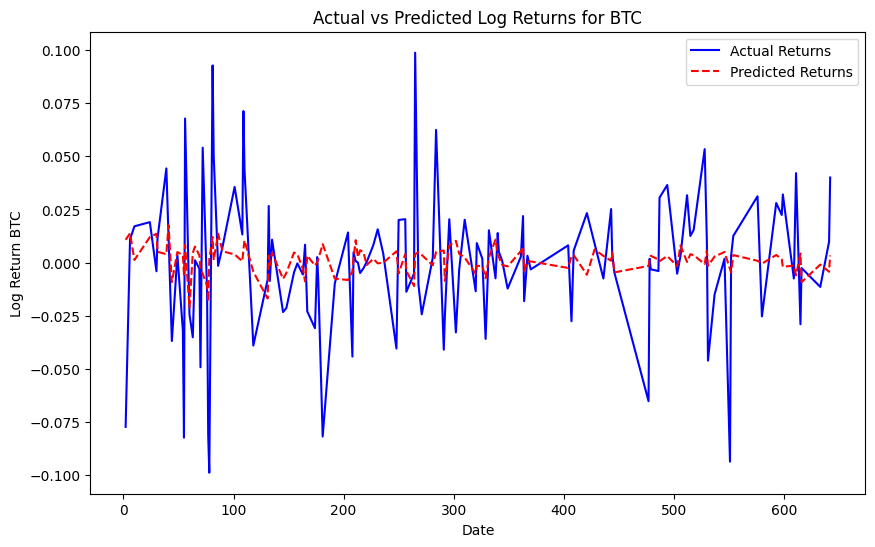

In [ ]:

X = df_lag_cleaned[regressors_exgo]
y = df_lag_cleaned["y"]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Feature selection using coefficients from the linear regression model
model = SelectFromModel(lr_model, threshold='mean', prefit=True)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

# Re-train the linear regression model using the selected features
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_selected, y_train)

# Make predictions using the selected features
y_pred_train = lr_model_selected.predict(X_train_selected)
y_pred_test = lr_model_selected.predict(X_test_selected)

# Calculate metrics: MSE and R²
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
# Add a constant to the model (intercept)
X_train_with_constant = sm.add_constant(X_train_selected)

# Fit the model using statsmodels
lr_model_sm = sm.OLS(y_train, X_train_with_constant).fit()

# Display the summary, which includes p-values
display(lr_model_sm.summary())

# Make predictions using the selected features
y_pred_train = lr_model_selected.predict(X_train_selected)
y_pred_test = lr_model_selected.predict(X_test_selected)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")

# Get the names of the selected features
selected_features = np.array(regressors_exgo)[model.get_support()]

print("Selected Features:", selected_features)


import matplotlib.pyplot as plt

# Ensure the test data and predictions are sorted by index for proper plotting
y_test_sorted = pd.Series(y_test, index=y_test.index).sort_index()
y_pred_test_sorted = pd.Series(y_pred_test, index=y_test.index).sort_index()

# Plotting the predicted vs actual returns using line plots
plt.figure(figsize=(10,6))

# Line plot for actual returns
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Returns', color='blue', linestyle='-')

# Line plot for predicted returns
plt.plot(y_pred_test_sorted.index, y_pred_test_sorted, label='Predicted Returns', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Log Return BTC')
plt.title('Actual vs Predicted Log Returns for BTC')
plt.legend()
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     16.02
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           5.71e-10
Time:                        23:11:09   Log-Likelihood:                 1099.5
No. Observations:                 516   AIC:                            -2191.
Df Residuals:                     512   BIC:                            -2174.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.001      1.362      0.174      -0.001       0.004
x1            -0.0251      0.007     -3.426      0.001      -0.040      -0.011
x2             0.0167      0.006      2.690      0.007       0.004       0.029
x3             0.0154      0.002      6.361      0.000       0.011       0.020
==============================================================================
Omnibus:                       27.418   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.639
Skew:                           0.095   Prob(JB):                     1.14e-18
Kurtosis:                       4.951   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train MSE: 0.000825357630441288
Test MSE: 0.0010417691146684923
Train R²: 0.08581869461994329
Test R²: 0.017968670155656286
Selected Features: ['macd' 'macd_signal' 'rsi']


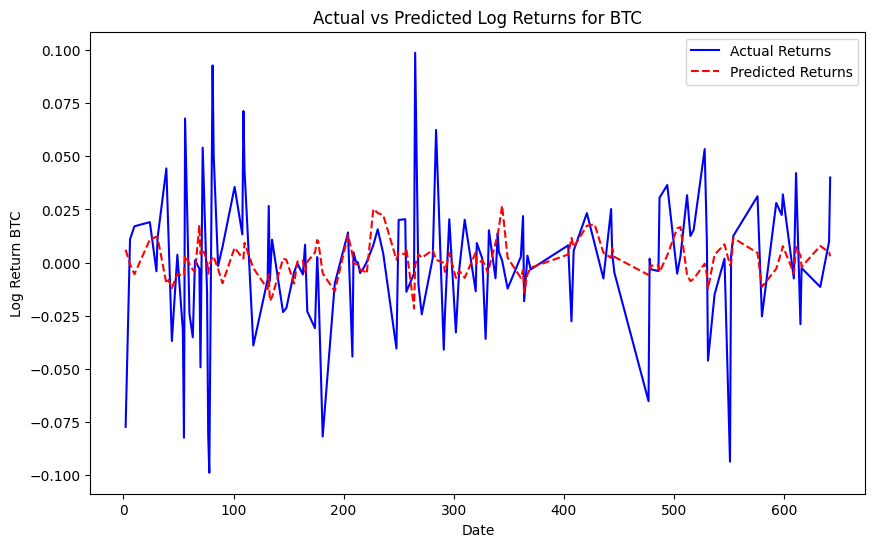

In [ ]:

X = df_lag_cleaned[regressors_exgo_tech]
y = df_lag_cleaned["y"]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Feature selection using coefficients from the linear regression model
model = SelectFromModel(lr_model, threshold='mean', prefit=True)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

# Re-train the linear regression model using the selected features
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_selected, y_train)

# Make predictions using the selected features
y_pred_train = lr_model_selected.predict(X_train_selected)
y_pred_test = lr_model_selected.predict(X_test_selected)

# Calculate metrics: MSE and R²
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
# Add a constant to the model (intercept)
X_train_with_constant = sm.add_constant(X_train_selected)

# Fit the model using statsmodels
lr_model_sm = sm.OLS(y_train, X_train_with_constant).fit()

# Display the summary, which includes p-values
display(lr_model_sm.summary())

# Make predictions using the selected features
y_pred_train = lr_model_selected.predict(X_train_selected)
y_pred_test = lr_model_selected.predict(X_test_selected)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")

# Get the names of the selected features
selected_features = np.array(regressors_exgo_tech)[model.get_support()]

print("Selected Features:", selected_features)


import matplotlib.pyplot as plt

# Ensure the test data and predictions are sorted by index for proper plotting
y_test_sorted = pd.Series(y_test, index=y_test.index).sort_index()
y_pred_test_sorted = pd.Series(y_pred_test, index=y_test.index).sort_index()

# Plotting the predicted vs actual returns using line plots
plt.figure(figsize=(10,6))

# Line plot for actual returns
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Returns', color='blue', linestyle='-')

# Line plot for predicted returns
plt.plot(y_pred_test_sorted.index, y_pred_test_sorted, label='Predicted Returns', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Log Return BTC')
plt.title('Actual vs Predicted Log Returns for BTC')
plt.legend()
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     13.37
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           2.92e-12
Time:                        23:11:12   Log-Likelihood:                 1108.2
No. Observations:                 516   AIC:                            -2204.
Df Residuals:                     510   BIC:                            -2179.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.001      1.381      0.168      -0.001       0.004
x1             0.1295      0.016      8.037      0.000       0.098       0.161
x2            -0.0929      0.012     -7.926      0.000      -0.116      -0.070
x3             0.1078      0.015      7.354      0.000       0.079       0.137
x4             0.0852      0.012      6.903      0.000       0.061       0.109
x5            -0.2960      0.039     -7.654      0.000      -0.372      -0.220
x6             0.0987      0.013      7.634      0.000       0.073       0.124
==============================================================================
Omnibus:                       26.393   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.189
Skew:                           0.289   Prob(JB):                     1.71e-12
Kurtosis:                       4.478   Cond. No.                     1.36e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Train MSE: 0.000798217178562011
Test MSE: 0.0008494196314348066
Train R²: 0.11587995874654544
Test R²: 0.19928832741479618
Selected Features: ['macd' 'macd_signal' 'bollinger_upper' 'bollinger_lower' 'BTC Close_ma_5'
 'BTC Close_ma_20']


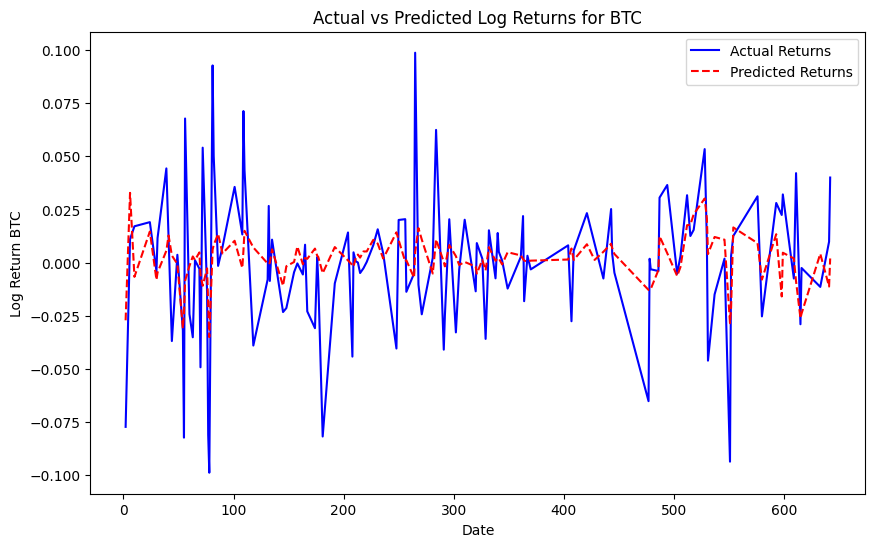

In [ ]:

X = df_lag_cleaned[regressors_exgo_tech_ma]
y = df_lag_cleaned["y"]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Feature selection using coefficients from the linear regression model
model = SelectFromModel(lr_model, threshold='mean', prefit=True)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

# Re-train the linear regression model using the selected features
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_selected, y_train)

# Make predictions using the selected features
y_pred_train = lr_model_selected.predict(X_train_selected)
y_pred_test = lr_model_selected.predict(X_test_selected)

# Calculate metrics: MSE and R²
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
# Add a constant to the model (intercept)
X_train_with_constant = sm.add_constant(X_train_selected)

# Fit the model using statsmodels
lr_model_sm = sm.OLS(y_train, X_train_with_constant).fit()

# Display the summary, which includes p-values
display(lr_model_sm.summary())

# Make predictions using the selected features
y_pred_train = lr_model_selected.predict(X_train_selected)
y_pred_test = lr_model_selected.predict(X_test_selected)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")

# Get the names of the selected features
selected_features = np.array(regressors_exgo_tech_ma)[model.get_support()]

print("Selected Features:", selected_features)


import matplotlib.pyplot as plt

# Ensure the test data and predictions are sorted by index for proper plotting
y_test_sorted = pd.Series(y_test, index=y_test.index).sort_index()
y_pred_test_sorted = pd.Series(y_pred_test, index=y_test.index).sort_index()

# Plotting the predicted vs actual returns using line plots
plt.figure(figsize=(10,6))

# Line plot for actual returns
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Returns', color='blue', linestyle='-')

# Line plot for predicted returns
plt.plot(y_pred_test_sorted.index, y_pred_test_sorted, label='Predicted Returns', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Log Return BTC')
plt.title('Actual vs Predicted Log Returns for BTC')
plt.legend()
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          1.89e-110
Time:                        23:11:15   Log-Likelihood:                 1349.8
No. Observations:                 516   AIC:                            -2680.
Df Residuals:                     506   BIC:                            -2637.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.001      2.250      0.025       0.000       0.003
x1            -0.0014      0.005     -0.287      0.774      -0.011       0.008
x2            -0.0046      0.004     -1.254      0.210      -0.012       0.003
x3             1.4209      0.051     28.003      0.000       1.321       1.521
x4             0.1003      0.043      2.338      0.020       0.016       0.185
x5            -0.0028      0.003     -0.907      0.365      -0.009       0.003
x6            -0.5927      0.021    -28.144      0.000      -0.634      -0.551
x7            -0.2977      0.016    -18.105      0.000      -0.330      -0.265
x8            -0.2950      0.016    -18.526      0.000      -0.326      -0.264
x9            -0.2962      0.015    -19.752      0.000      -0.326      -0.267
x10           -0.0352      0.015     -2.285      0.023      -0.065      -0.005
==============================================================================
Omnibus:                       81.946   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              597.328
Skew:                           0.437   Prob(JB):                    1.96e-130
Kurtosis:                       8.198   Cond. No.                     1.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Train MSE: 0.0003128779751446361
Test MSE: 0.000436063536004459
Train R²: 0.6534505949990863
Test R²: 0.588941495644786
Selected Features: ['bollinger_upper' 'bollinger_lower' 'BTC Close_ma_5' 'BTC Close_ma_10'
 'BTC Close_ma_20' 'BTC Close_lag_1' 'BTC Close_lag_2' 'BTC Close_lag_3'
 'BTC Close_lag_4' 'BTC Close_lag_7']


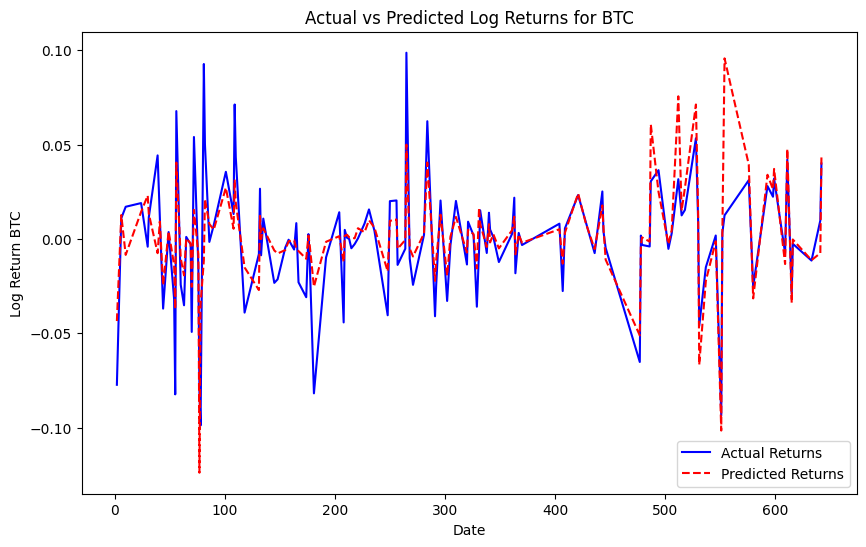

In [ ]:

X = df_lag_cleaned[regressors_all]
y = df_lag_cleaned["y"]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Feature selection using coefficients from the linear regression model
model = SelectFromModel(lr_model, threshold='mean', prefit=True)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

# Re-train the linear regression model using the selected features
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_selected, y_train)

# Make predictions using the selected features
y_pred_train = lr_model_selected.predict(X_train_selected)
y_pred_test = lr_model_selected.predict(X_test_selected)

# Calculate metrics: MSE and R²
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
# Add a constant to the model (intercept)
X_train_with_constant = sm.add_constant(X_train_selected)

# Fit the model using statsmodels
lr_model_sm = sm.OLS(y_train, X_train_with_constant).fit()

# Display the summary, which includes p-values
display(lr_model_sm.summary())

# Make predictions using the selected features
y_pred_train = lr_model_selected.predict(X_train_selected)
y_pred_test = lr_model_selected.predict(X_test_selected)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")

# Get the names of the selected features
selected_features = np.array(regressors_all)[model.get_support()]

print("Selected Features:", selected_features)


import matplotlib.pyplot as plt

# Ensure the test data and predictions are sorted by index for proper plotting
y_test_sorted = pd.Series(y_test, index=y_test.index).sort_index()
y_pred_test_sorted = pd.Series(y_pred_test, index=y_test.index).sort_index()

# Plotting the predicted vs actual returns using line plots
plt.figure(figsize=(10,6))

# Line plot for actual returns
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Returns', color='blue', linestyle='-')

# Line plot for predicted returns
plt.plot(y_pred_test_sorted.index, y_pred_test_sorted, label='Predicted Returns', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Log Return BTC')
plt.title('Actual vs Predicted Log Returns for BTC')
plt.legend()
plt.show()